In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from io import StringIO

In [35]:
#Read in Data
pickup_data = pd.read_csv('6_pickup.csv')
mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')
full_refundable_rates_data = pd.read_csv('data-1725876476777.csv')



/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_62077/3388823184.py:3: DtypeWarning: Columns (6,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')


In [49]:
def create_normalized_heatmap(data, start_date, end_date, value_column='refundable_rate', cmap='coolwarm'):
    # Convert 'report_date' and 'stay_date' to datetime and then to date
    data['report_date'] = pd.to_datetime(data['report_date']).dt.date
    data['stay_date'] = pd.to_datetime(data['stay_date']).dt.date
    
    # Create a pivot table
    pivot_data = data.pivot_table(values=value_column, index='report_date', columns='stay_date', aggfunc='sum')
    
    # Sort the index (report_date) and columns (stay_date)
    pivot_data = pivot_data.sort_index()
    pivot_data = pivot_data.reindex(columns=sorted(pivot_data.columns))
    
    # Convert start_date and end_date to datetime.date objects if they're not already
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    
    # Select the date range
    date_range = pd.date_range(start=start_date, end=end_date).date
    filtered_data = pivot_data.loc[:, pivot_data.columns.isin(date_range)]
    
    # Normalize the data to 0-1 range
    normalized_data = (filtered_data - filtered_data.min().min()) / (filtered_data.max().max() - filtered_data.min().min())
    
    # Check if the filtered data is not empty
    if not normalized_data.empty:
        # Set up the plot style
        plt.style.use('default')
        
        # Create the figure and axes
        fig, ax = plt.subplots(figsize=(20, 16))
        
        # Reverse the order of the stay dates (y-axis)
        stay_dates = normalized_data.columns[::-1]
        
        # Create the heatmap using seaborn
        sns.heatmap(
            normalized_data.T.loc[stay_dates],
            cmap=cmap,
            annot=False,
            fmt='.2f',
            cbar_kws={'label': f'Normalized {value_column}'},
            ax=ax
        )
        
        # Set title and labels
        ax.set_title(f'Normalized Heatmap of {value_column}\nfor Stay Dates from {start_date} to {end_date}',
                     fontsize=20, fontweight='bold', pad=20)
        ax.set_xlabel('Report Date', fontsize=14, labelpad=10)
        ax.set_ylabel('Stay Date', fontsize=14, labelpad=10)
        
        # Set x-axis ticks to start from start_date and show every 30th day
        x_ticks = pd.date_range(start=start_date, end=normalized_data.index[-1], freq='30D')
        ax.set_xticks(normalized_data.index.get_indexer(x_ticks))
        ax.set_xticklabels(x_ticks.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=10)
        
        # Set y-axis ticks to start from start_date and show every 30th day
        y_ticks = pd.date_range(start=start_date, end=normalized_data.columns[-1], freq='30D')[::-1]
        ax.set_yticks(normalized_data.columns.get_indexer(y_ticks))
        ax.set_yticklabels(y_ticks.strftime('%Y-%m-%d'), fontsize=10)
        
        # Remove gridlines
        ax.grid(False)
        
        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for stay dates from {start_date} to {end_date}.")



In [50]:
#Read in Data
pickup_data = pd.read_csv('6_pickup.csv')
mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')
full_refundable_rates_data = pd.read_csv('data-1725876476777.csv')



/var/folders/7m/8y6jbsj56511tmcdmrpyjlrr0000gn/T/ipykernel_62077/3388823184.py:3: DtypeWarning: Columns (6,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  mismatched_rates_data = pd.read_csv('rates_6_refundables.csv')


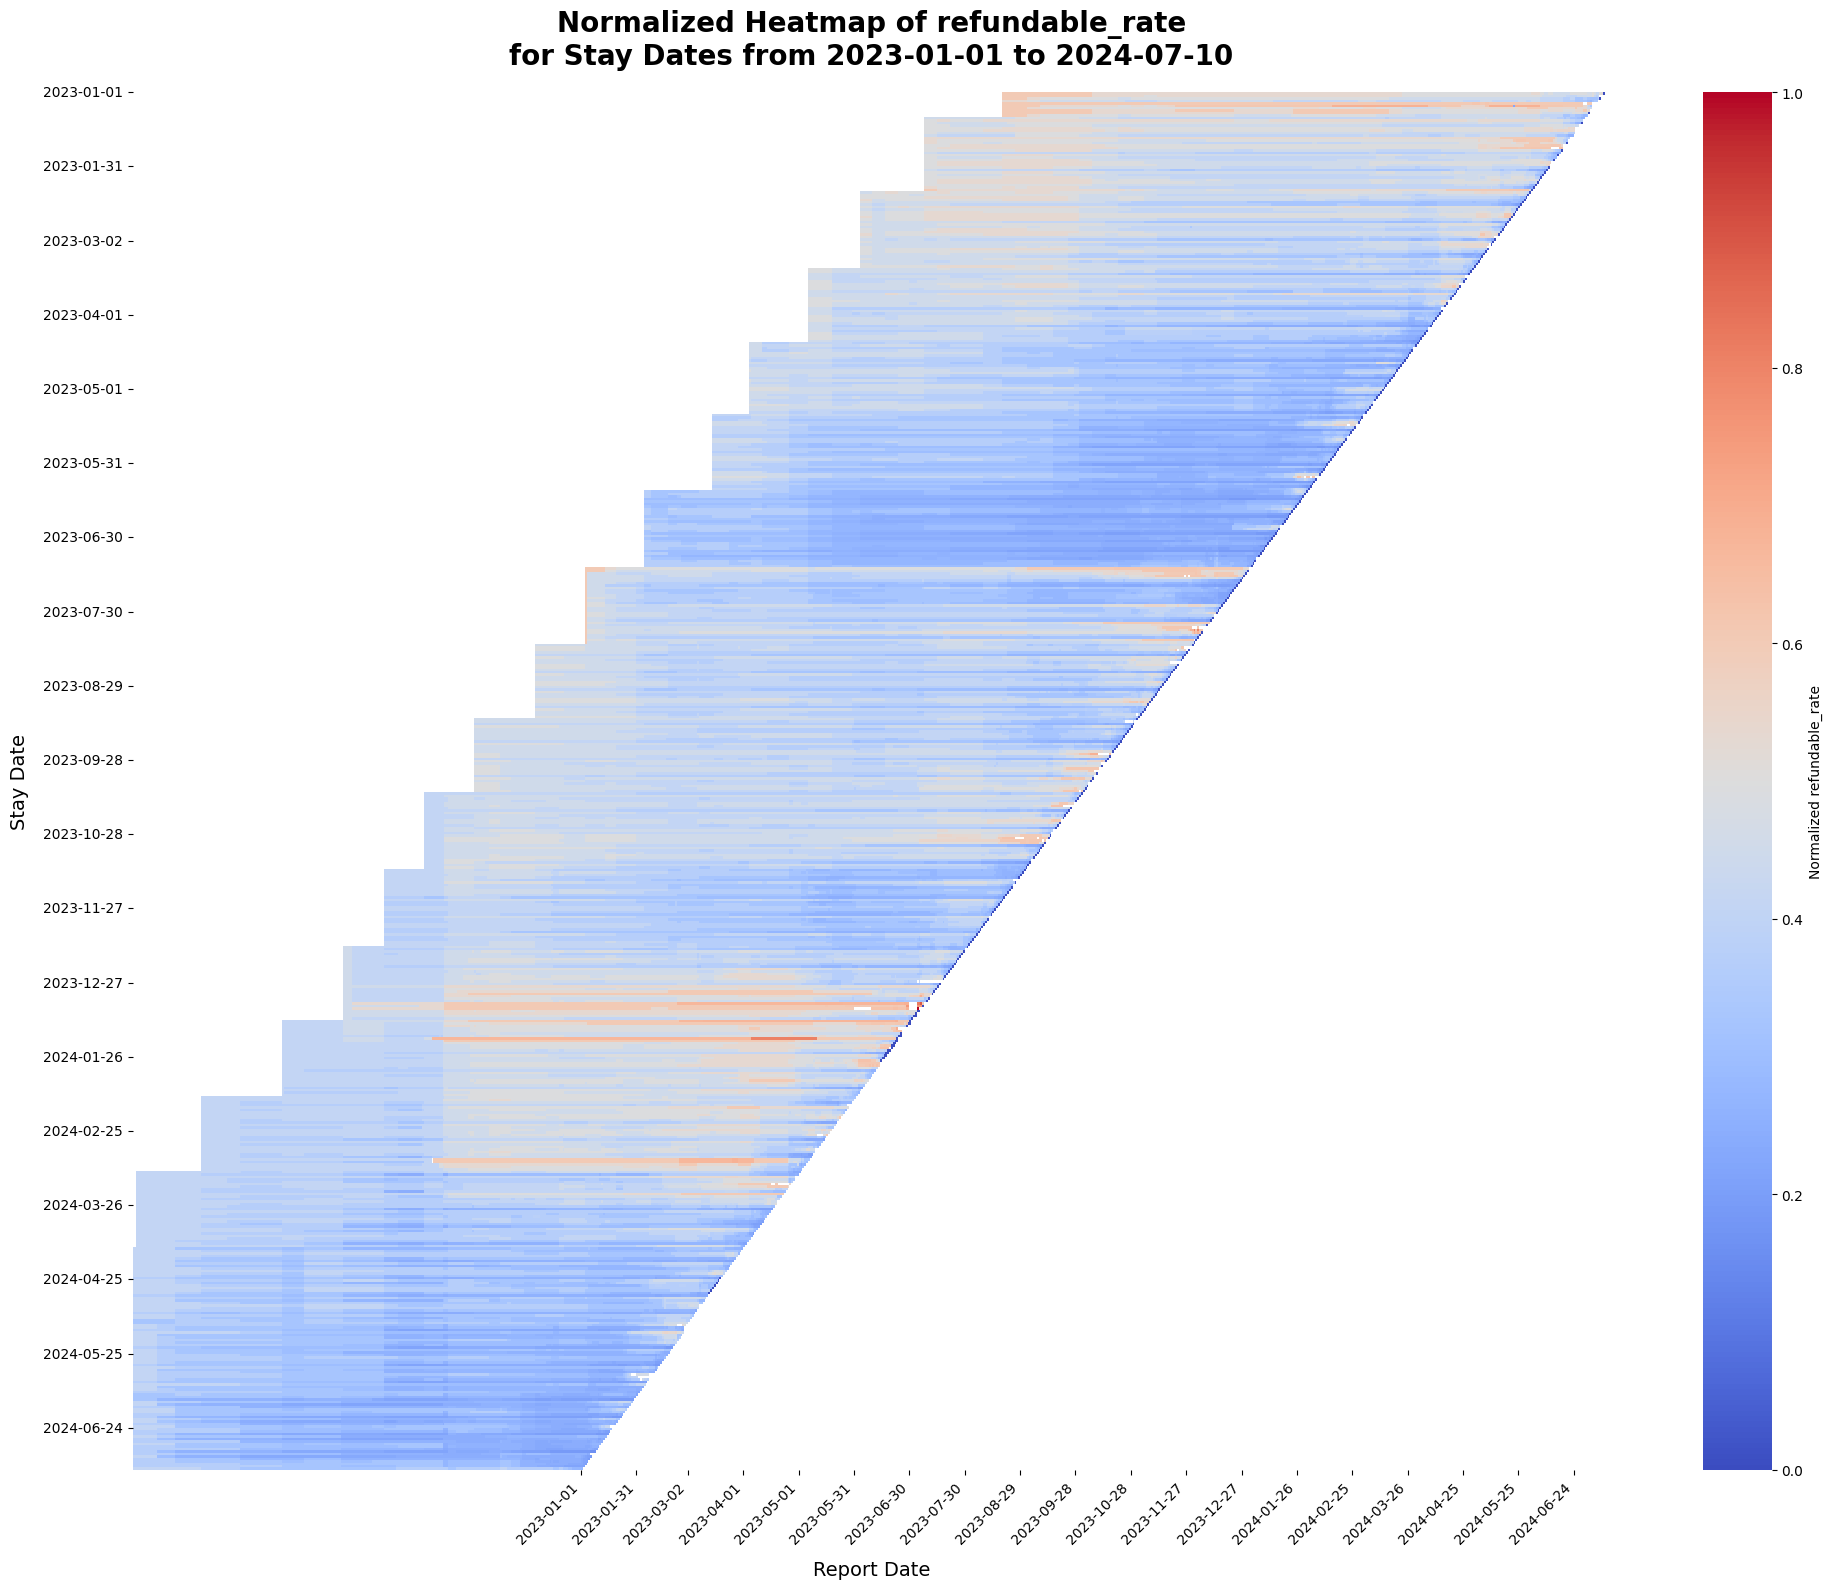

In [51]:
#Ful Refundable Rates
create_normalized_heatmap(full_refundable_rates_data, '2023-01-01', '2024-07-10', 'refundable_rate', cmap='coolwarm')

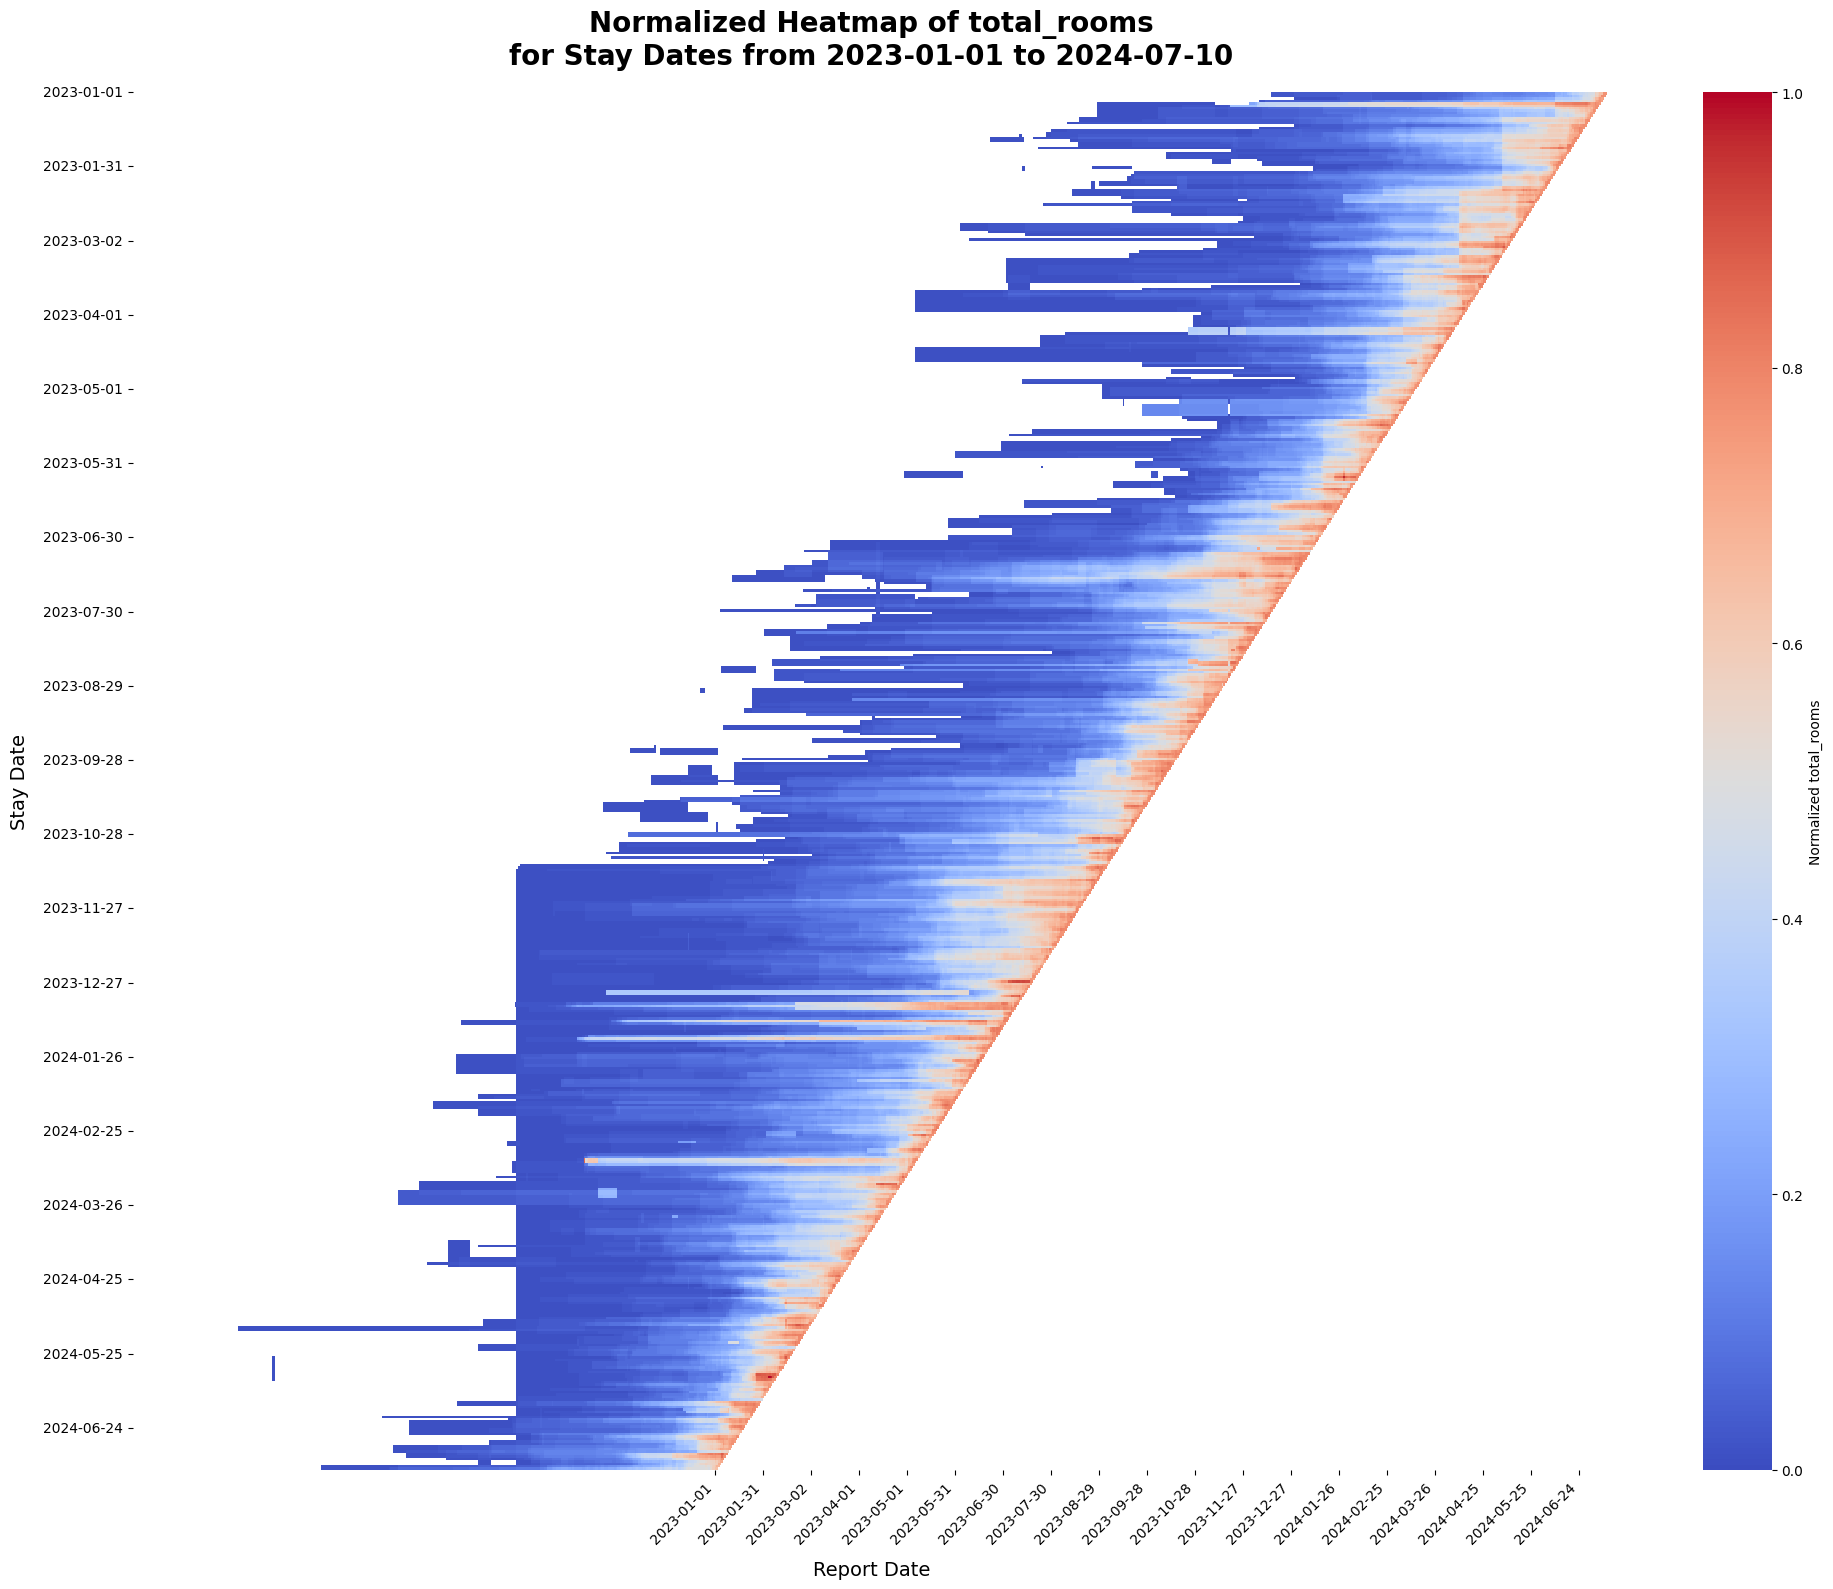

In [52]:
#Pickup Data
create_normalized_heatmap(pickup_data, '2023-01-01', '2024-07-10', 'total_rooms')